In [1]:
import pandas, matplotlib, json, urllib, numpy, PIL
from PIL import Image as img
import matplotlib.pyplot as plt
from IPython.display import SVG, Image, HTML
from PIL.ExifTags import TAGS

In [3]:
def APOD(date, key, hd=False, debug=False):
    """We will be pulling some data from the images."""
    request='https://api.nasa.gov/planetary/apod'
    key=key
    form={'date': date, 'api_key': key}
    query=urllib.parse.urlencode(form)
    APOD_request=urllib.request.urlopen(request+"?"+query)
    if debug==True:
        print(APOD_request.info())
    response=json.loads(APOD_request.read())
    print('Title: ' + response['title'])
    print('Date: ' + response['date'])
    print('Explanation: '+ response['explanation'])
    print('URL : ' + response['url'])
    fname=str('APOD'+'_'+date+'.jpg')
    apod_img=urllib.request.urlretrieve(response['url'], fname)
    im=img.open(fname)
    display=plt.imread(fname)
    plt.imshow(display)
    PIL_format=PIL.Image.open(fname)
    exif_data = PIL_format._getexif()
    ret = {}
    try:
        for tag, value in exif_data.items():
            decoded = TAGS.get(tag, tag)
            ret[decoded] = value
    except:
        pass
    return ret, response

Title: Cygnus: Bubble and Crescent
Date: 2015-12-04
Explanation: These clouds of gas and dust drift through rich star fields along the plane of our Milky Way Galaxy toward the high flying constellation Cygnus. Caught within the telescopic field of view are the Soap Bubble (lower left) and the Crescent Nebula (upper right). Both were formed at a final phase in the life of a star. Also known as NGC 6888, the Crescent was shaped as its bright, central massive Wolf-Rayet star, WR 136, shed its outer envelope in a strong stellar wind. Burning through fuel at a prodigious rate, WR 136 is near the end of a short life that should finish in a spectacular supernova explosion.  recently discovered Soap Bubble Nebula is likely a planetary nebula, the final shroud of a lower mass, long-lived, sun-like star destined to become a slowly cooling white dwarf. While both are some 5,000 light-years or so distant, the larger Crescent Nebula is around 25 light-years across.
URL : https://apod.nasa.gov/apod/

({'ResolutionUnit': 2,
  'ExifOffset': 78,
  'XResolution': (72, 1),
  'YResolution': (72, 1),
  'ExifVersion': b'0210',
  'FlashPixVersion': b'0100',
  'ColorSpace': 65535},
 {'copyright': 'Ivan Eder',
  'date': '2015-12-04',
  'explanation': 'These clouds of gas and dust drift through rich star fields along the plane of our Milky Way Galaxy toward the high flying constellation Cygnus. Caught within the telescopic field of view are the Soap Bubble (lower left) and the Crescent Nebula (upper right). Both were formed at a final phase in the life of a star. Also known as NGC 6888, the Crescent was shaped as its bright, central massive Wolf-Rayet star, WR 136, shed its outer envelope in a strong stellar wind. Burning through fuel at a prodigious rate, WR 136 is near the end of a short life that should finish in a spectacular supernova explosion.  recently discovered Soap Bubble Nebula is likely a planetary nebula, the final shroud of a lower mass, long-lived, sun-like star destined to bec

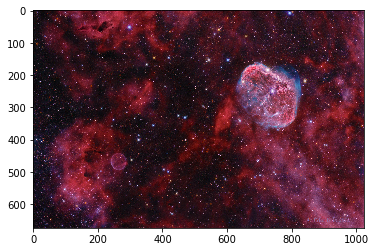

In [5]:
APOD('2015-12-4', api_key)